In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as ptl
%matplotlib inline 
import sqlite3 as sql

In [18]:
def fetch_axes(db_conn, query, *args):
    return list(zip(*db_conn.cursor().execute(query,args)))

In [56]:
conn = sql.connect('test_it.db')

In [36]:
query = """SELECT algorithm_run.id, COUNT(search_run.id)
FROM algorithm_run JOIN search_run ON algorithm_run.id = search_run.algorithm_run_id
GROUP BY algorithm_run.id
"""

In [57]:
x, y = fetch_axes(conn, query)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


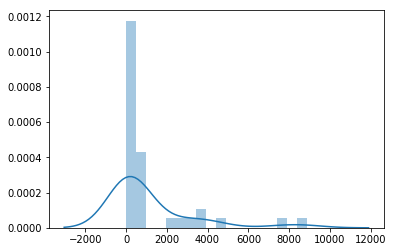

In [58]:
sns.distplot(y);

In [47]:
query2 = """
SELECT entropy
FROM search_run
WHERE last_unsat > 0
"""

query3 = """
SELECT entropy
FROM search_run
WHERE last_unsat = 0
"""

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


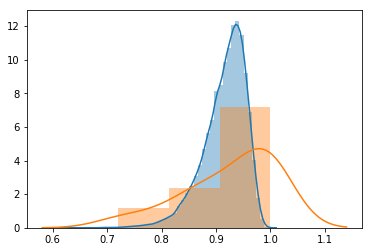

In [59]:
failures, = fetch_axes(conn, query2)
successes = fetch_axes(conn, query3)
sns.distplot(failures);
sns.distplot(successes);